# Линейная регрессия


    
Актуальные данные для анализа берутся с сайта [finam.ru](https://www.finam.ru/profile/mosbirzha-fyuchersy/si-9-16-siu6/export/). Наверху можно выбрать огромное количество котировок.

Построить модель парной регрессии для определения зависимости между двумя показателями (например, зависимость акции компании N от курса валют или зависимость цен ювелирных изделий от цен на драгметаллы). Найти оценки для коэффициентов линейной регрессии с белым шумом (случайная величина epsilon). Построить линию регрессии.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# курс рубля
df1 = pd.read_csv(r'/Users/rinatmahmutov/Documents/DataSpell/Python Notebooks/data/financial_market_volatility/AMDCB_150201_220217.csv')
df1.tail()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
818,20220212,0,0.156125,0.156125,0.156125,0.156125,0
819,20220215,0,0.159700,0.159700,0.159700,0.159700,0
820,20220216,0,0.158679,0.158679,0.158679,0.158679,0
821,20220217,0,0.156198,0.156198,0.156198,0.156198,0
822,20220218,0,0.157818,0.157818,0.157818,0.157818,0


In [3]:
# акции германии
df2 = pd.read_csv(r'/Users/rinatmahmutov/Documents/DataSpell/Python Notebooks/data/financial_market_volatility/WDI-TDG_150201_220217.csv')
df2.tail()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
1701,20211111,0,0.1450,0.1580,0.1421,0.1505,1028957
1702,20211112,0,0.1470,0.1470,0.0750,0.0759,11942353
1703,20211115,0,0.0600,0.0699,0.0440,0.0489,10657276
1704,20211116,0,0.0489,0.0489,0.0489,0.0489,1
1705,20211117,0,0.0000,0.0000,0.0000,0.0000,0


возьмем 300 данных

In [4]:
data_x, data_y  = df1.loc[:299, "<CLOSE>"], df2.loc[:299, "<CLOSE>"]

In [5]:
x, y = np.array(data_x).reshape(-1,1), np.array(data_y).reshape(-1,1)

Воспользуемся готовой библиотекой scikit-learn

In [6]:
reg = LinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

# средняя абсолютная ошибка прогноза 
model_error = mean_absolute_error(y, y_pred)

print("Уравнение линейной регрессии: Y = {:.5} + {:.5}*X + {:.5}".format(reg.intercept_[0], reg.coef_[0][0], model_error))

Уравнение линейной регрессии: Y = -23.056 + 467.76*X + 3.16


Построим график

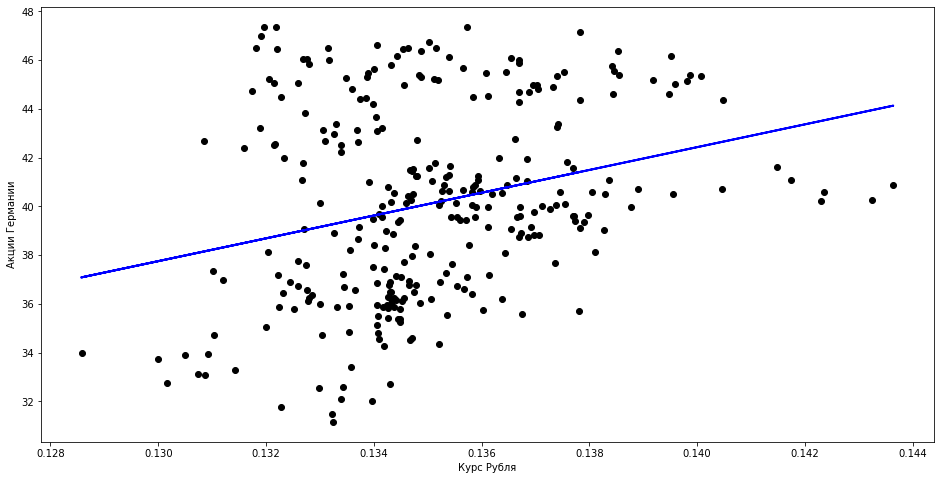

In [7]:
predictions = reg.predict(x)

plt.figure(figsize=(16, 8))

plt.scatter(
    data_x,
    data_y,
    c='black'
)
plt.plot(
    data_x,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Курс Рубля")
plt.ylabel("Акции Германии")
plt.show()

РАСЧЕТ СТАТИСТИЧЕСКИХ ХАРАКТЕРИСТИК

In [8]:
n = len(data_x)

x_hat = np.sum(data_x)/n
y_hat = np.sum(data_y)/n
yx_hat = np.sum(data_x * data_y)/n
x2_hat = np.sum(data_x ** 2)/n
y2_hat = np.sum(data_y ** 2)/n

# коварицаия 
cov_xy = yx_hat - y_hat * x_hat

#дисперсия признаков 
d_x = np.sqrt(x2_hat - x_hat**2)
d_y = np.sqrt(y2_hat - y_hat**2)

#  линейный коэффициент корреляции
r_xy = cov_xy / (d_x * d_y)

print(r_xy)

0.27590592426319943


Так как $|r_{xy}|<0.3$ то у нас слабая зависимость x от y 

Запишем выборочные дисперсии величин $y, \hat{y}, ϵ$

In [9]:
n = len(data_x)

# дисперсия наблюдаемых значений y
var_y = np.sum((data_y - y_hat)**2)/n

# дисперсия расчетных значений y
var_y_pred = np.sum((y_pred - y_hat)**2)/n

# дисперсия остатков
y_pred = np.squeeze(y_pred)
e = data_y - y_pred
e_hat = np.sum(e)/n
var_e = np.sum((e - e_hat)**2)/n

print(f"var_y = {var_y:.5}\n var_e + var_y_pred= {var_e + var_y_pred:.5}")

var_y = 15.348
 var_e + var_y_pred= 15.348


А теперь сделаем все тоже самое, только напишем свои функции для расчета 

Коэффициенты регрессии:
 a = -23.056 		    
 b = 467.76087

Уравнение линейной регрессии: Y = -23.056 + 467.76X + 3.16


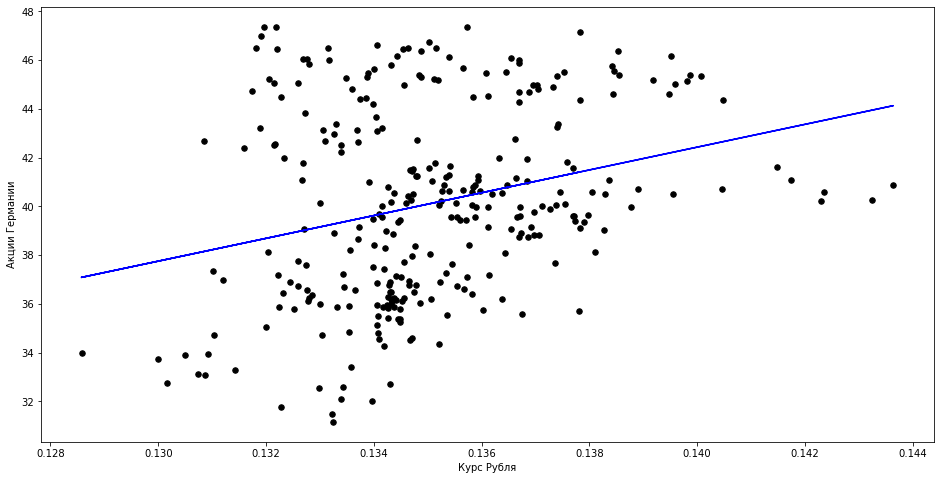

In [10]:
def estimate_coef(x: list, y: list) -> float:
    """функция поиска коэффицентов
    input:
      список x
      список y
    output:
      коэффиценты a, b
    """
	# количество наблюдений
    n = np.size(x)

	# среднее значение вектора x и y
    m_x = np.mean(x)
    m_y = np.mean(y)

	# вычисление перекресного отклонения и отклонения относительно x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

	# вычисление коэффициентов регрессии
    b = SS_xy / SS_xx
    a = m_y - b*m_x
  
    return a, b


def plot_regression_line(x: list, y: list, a:float, b: float) -> None:
    """функция построения графика
    input:
      списки x и y
      коэффиценты a и b
    output:
      график
    """

    # размер графика
    plt.figure(figsize=(16, 8))

	# построение фактических точек в виде диаграммы рассеяния
    plt.scatter(x, y, color = "black",
			marker = "o", s = 30)

    # предсказанный вектор ответов
    y_pred = a + b*x

	# построение линии регрессии
    plt.plot(x, y_pred, color = "blue")

	# размещение меток
    plt.xlabel('Курс Рубля')
    plt.ylabel('Акции Германии')

    plt.show()

def main():

    # данные
    x, y = np.array(data_x), np.array(data_y)

	# коэффициенты регрессии
    a, b = estimate_coef(x, y)

    # средняя абсолютная ошибка
    n = len(x)
    y_pred = a + b*x
    error = y - y_pred
    se = np.sum(np.abs(error))/n

    print("Коэффициенты регрессии:\n a = {:.5} \
		    \n b = {:.8}".format(a, b))

    print()
    print("Уравнение линейной регрессии: Y = {:.5} + {:.5}X + {:.5}".format(a, b, se))


	# график
    plot_regression_line(x, y, a, b)

if __name__ == "__main__":
	main()

# Задание 2. Выявление аномальных данных и неслучайных компонент.

Для набора данных временного ряда:
1. По методике Ирвина найти аномальные данные и заменить их на данные, не выбивающиеся из общего тренда.
2. Проверить гипотезу о наличии неслучайных компонент по критерию Стьюдента или по методу серий.

## Часть 1

In [11]:
# курс рубля
data_x

0      0.137824
1      0.136716
2      0.136376
3      0.137463
4      0.135821
         ...   
295    0.130744
296    0.130491
297    0.130162
298    0.129989
299    0.128576
Name: <CLOSE>, Length: 300, dtype: float64

In [12]:
# среднее
x_avr = data_x.mean()
print(x_avr)

# S^2
SS = data_x.var()
print(SS)

# S
S = np.sqrt(SS)
print(S)

# n ряда
n = len(data_x)

# I_i
I_i = [np.abs(data_x[i+1] - data_x[i])/S for i in range(n-1)]
df_Ii = pd.DataFrame(I_i)
print(df_Ii)

0.13506273
5.357774003779265e-06
0.0023146865886722687
            0
0    0.478683
1    0.146888
2    0.469610
3    0.709383
4    0.169353
..        ...
294  0.079060
295  0.109302
296  0.142136
297  0.074740
298  0.610450

[299 rows x 1 columns]


In [13]:
# I предельное при alpha = 0.05
I = {'n':[2, 3, 10, 20, 30, 50, 100, 400], 'I_i':[2.8, 2.2, 1.5, 1.3, 1.2, 1.1, 1, 0.9]}
df_I = pd.DataFrame(I)
print(df_I)

     n  I_i
0    2  2.8
1    3  2.2
2   10  1.5
3   20  1.3
4   30  1.2
5   50  1.1
6  100  1.0
7  400  0.9


In [14]:
df_I.I_i[7]

0.9

In [15]:
df_I.n[7]

400

In [16]:
# I предельное (n)
I_n = (df_I.I_i[7] - df_I.I_i[6]) / (df_I.n[7] - df_I.n[6]) * n + ((df_I.n[7]*df_I.I_i[6] - df_I.n[6]*df_I.I_i[7])/(df_I.n[7] - df_I.n[6]))
print(f'При n={n}: I_пред({n})={I_n}')

При n=300: I_пред(300)=0.9333333333333335


In [17]:
# I_i > I_пред(300)
df = df_Ii.where(df_Ii > I_n)
df = df.dropna()
df

,0
26,1.255462
59,2.141975


In [18]:
data_x.iloc[26]

0.139554

In [19]:
# для x = 26
new_26 = (data_x.iloc[25] + data_x.iloc[27]) / 2

In [20]:
data_x.iloc[26] = new_26

print(data_x.iloc[26])

0.137776


In [21]:
data_x.iloc[59]

0.143238

In [22]:
# для x = 59
new_59 = (data_x.iloc[58] + data_x.iloc[60]) / 2

In [23]:
data_x.iloc[59] = new_59

print(data_x.iloc[59])

0.14095999999999997


## Часть два

In [24]:
# х - исходное
x_ish = data_x
# х - упорядочные
x_ranz = data_x.sort_values()
# х - первая половина
x1 = data_x.iloc[ : len(data_x)//2]
# х - вторая половина
x2 = data_x.iloc[len(data_x)//2 : ]

In [25]:
# D(x1) - дисперси х1
x1_var = x1.var()

# D(x2) -  дисперсия х2
x2_var = x2.var()

print(f'D(x1) = {x1_var}, D(x2) = {x2_var}')
print(f'D(x1) = D(x2), тогда используем критерий Стьюдента' if x2_var == x1_var else f'D(x1) != D(x2), тогда сипользуем критерий серий')

D(x1) = 4.793673184295297e-06, D(x2) = 5.1391026212080556e-06
D(x1) != D(x2), тогда сипользуем критерий серий


In [26]:
# Находим медиану
x_med = x_ranz.median()

In [27]:
x_med

0.1346835

In [28]:
data_x = pd.DataFrame(data_x)

In [29]:
result = ['+' if x > x_med else '-' for x in data_x['<CLOSE>']]

In [30]:
data_x["Result"] = np.array(result)

In [31]:
data_x

,<CLOSE>,Result
0,0.137824,+
1,0.136716,+
2,0.136376,+
3,0.137463,+
4,0.135821,+
...,...,...
295,0.130744,-
296,0.130491,-
297,0.130162,-
298,0.129989,-


In [33]:
# число последовательностей '+' и '-'
data_x['seq'] = (data_x.Result!=data_x.Result.shift()).ne(0).cumsum()

In [34]:
data_x

,<CLOSE>,Result,seq
0,0.137824,+,1
1,0.136716,+,1
2,0.136376,+,1
3,0.137463,+,1
4,0.135821,+,1
...,...,...,...
295,0.130744,-,36
296,0.130491,-,36
297,0.130162,-,36
298,0.129989,-,36


In [35]:
# самая длинная серия tau(n) из '+' или '-'
from itertools import groupby

# в s  запишем список последовательности плюсов и минусов
s = result
# длинна самой длинной подпоследовательности
max(sum(1 for _ in g) for k, g in groupby(s) if k)

64

In [37]:
max([len(list(group)) for key, group in groupby(s)])

64

In [40]:
v_n = 36
tau_n = 64

In [41]:
v = (n+2 - 1.96*np.sqrt(n-1))/2
tau = (1.43 * np.log(n+1))

print(f'v={v}, tau={tau}')

v=134.05421586352523, tau=8.16116767859089


По условию неравенства
- V(n) > v
- tau(n) < tau

In [44]:
print(f'так как нарушены условия неравенства V(n)={v_n} не больше {v} и tau(n)={tau_n} не меньше {tau}')
print('то гипотезу H0 о неизменности среднего отвергаем')

так как нарушены условия неравенства V(n)=36 не больше 134.05421586352523 и tau(n)=64 не меньше 8.16116767859089
то гипотезу H0 о неизменности среднего отвергаем


# 3. Определение параметров модели ARMA(p,q). Построение прогноза временного ряда


Цель: данные временного ряда для любого стационарного процесса (график имеет колебания вдоль горизонтальной прямой, равной среднему значению ряда, в течение некоторого периода) после центрирования (т.е. вычитания среднего) и нормирования (т.е. деления на корень из дисперсии) проверить на соответствие/несоответствие модели ARMA (p,q), используя коррелограмму (графики автокорреляционной и частной автокорреляционной функции с лагами до 10-15 шагов). Дополнительные сведения для этой задачи можно найти по [ссылке](https://studme.org/41017/ekonomika/opredelenie_poryadka_modeli_avtoregressii_skolzyaschey_sredney)
Дополнительно: после определения параметров p и q построить прогноз временного ряда на 3-5 шагов вперед.

Ссылки
- [habr](https://habr.com/ru/post/207160/)
- [лекция](https://github.com/AnastasiyaMax/ML_DPO_2021_spring/blob/a30d463af9958d96eceb757c31ac2223db92761f/class_15/lecture_15_ts.ipynb)
- [семинар](https://github.com/AnastasiyaMax/ML_DPO_2021_spring/blob/a30d463af9958d96eceb757c31ac2223db92761f/class_15/sem15_ts.ipynb)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import pacf, plot_acf, plot_pacf
from statsmodels.tsa import stattools

In [47]:
# акции германии
df1 = pd.read_csv(r'/Users/rinatmahmutov/Documents/DataSpell/Python Notebooks/data/financial_market_volatility/WDI-TDG_150201_220217.csv')
df1.tail()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
1701,20211111,0,0.1450,0.1580,0.1421,0.1505,1028957
1702,20211112,0,0.1470,0.1470,0.0750,0.0759,11942353
1703,20211115,0,0.0600,0.0699,0.0440,0.0489,10657276
1704,20211116,0,0.0489,0.0489,0.0489,0.0489,1
1705,20211117,0,0.0000,0.0000,0.0000,0.0000,0


<AxesSubplot:>

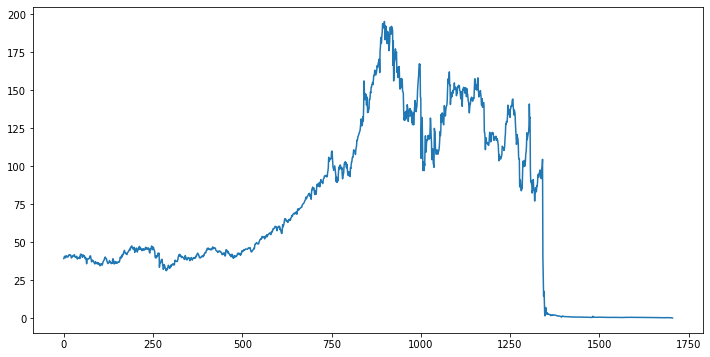

In [48]:
data_all  = df1.loc[:, "<CLOSE>"]

data_all.plot(figsize=(12,6))

In [49]:
data_x  = df1.loc[700:1000, "<CLOSE>"]

<AxesSubplot:>

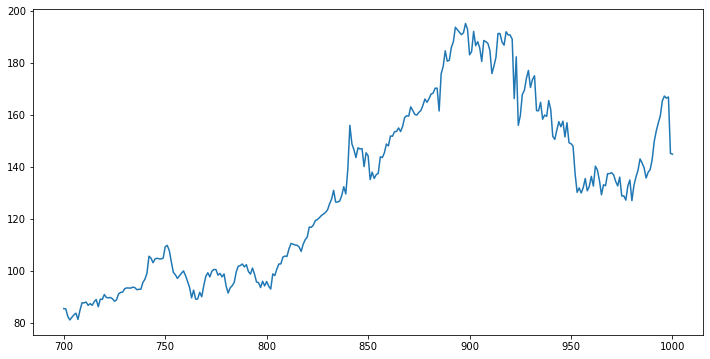

In [50]:
data_x.plot(figsize=(12,6))

In [51]:
time_series = pd.Series(data_x)

In [52]:
time_series

700      85.66
701      85.54
702      82.64
703      81.29
704      82.32
         ...  
996     167.35
997     166.55
998     167.00
999     145.30
1000    145.00
Name: <CLOSE>, Length: 301, dtype: float64

1. Проверка ADF:

Проверьте стабильность данных. Нестабильные данные не могут обеспечить лучший результат прогнозирования. Если p-значение тестовых выходных данных велико, это означает, что данные нестабильны.

In [53]:
def adf_test(ts):
    """
    Для проверки стационарности  проведем обобщенный тест Дикки-Фуллера на наличие единичных корней.
    Для этого в модуле statsmodels есть функция adfuller()
    """
    adftest = adfuller(ts)
    adf_res = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key, value in adftest[4].items():
        adf_res['Critical Value (%s)' % key] = value

    if adftest[0] > adftest[4]['5%']:
        print('есть единичные корни, ряд не стационарен')
    else:
        print('единичных корней нет, ряд стационарен')

    return adf_res

In [54]:
adf_test(time_series)

есть единичные корни, ряд не стационарен


Test Statistic                  -1.421781
p-value                          0.571790
Lags Used                       16.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64

Проведенный тест подтвердил предположения о не стационарности ряда.

Во многих случаях взятие разности рядов позволяет решить проюдему.

Если, например, первые разности ряда стационарны, то он называется интегрированным рядом первого порядка.

Итак, давайте определим порядок интегрированного ряда для нашего ряда

2. Сглаживание

Если данные нестабильны, их необходимо сначала сгладить. Общие методы включают метод разности и логарифмический метод.

Функция diff() вычисляет разность исходного ряда с рядом с заданным смещением периода.
Период смещения передается как параметр period.
Т.к. в разности первое значение получиться неопределенным, то нам надо избавиться от него для этого и используется метод dropna().

In [55]:
# Первое отличие
def ts_diff(ts, d=1):
    return ts.diff(d).dropna(how=any)


In [56]:
time_series_diff = ts_diff(time_series)

In [57]:
time_series_diff

701     -0.12
702     -2.90
703     -1.35
704      1.03
705      0.91
        ...  
996      1.85
997     -0.80
998      0.45
999    -21.70
1000    -0.30
Name: <CLOSE>, Length: 300, dtype: float64

In [58]:
adf_test(time_series_diff)

единичных корней нет, ряд стационарен


Test Statistic                  -3.513420
p-value                          0.007649
Lags Used                       15.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64

In [59]:
time_series_diff.index

Int64Index([ 701,  702,  703,  704,  705,  706,  707,  708,  709,  710,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', length=300)

Получившийся ряд первых разностей приблизился к стационарному.


Убедимся в отсутствии тренда для этого построим график нашего нового ряда

<AxesSubplot:>

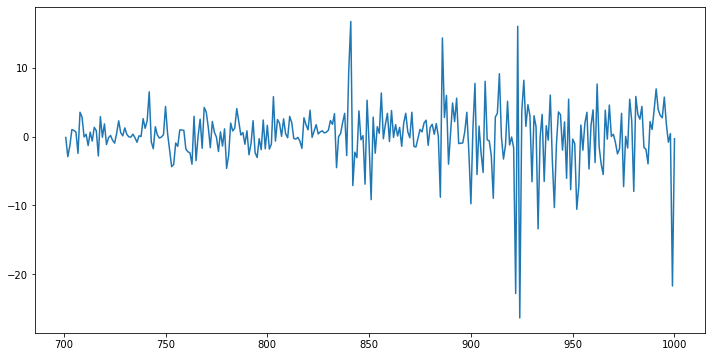

In [60]:
time_series_diff.plot(figsize=(12,6))

Тренд действительно отсутствует, таким образом ряд первых разностей является стационарным, а наш исходный ряд — интегрированным рядом первого порядка.

3. Установите порядок

Найдите порядок модели AR и модели MA с максимальной точностью. Как правило, ACF (функция автокорреляции) и PACF (функция частичной автокорреляции) используются для определения порядка моделей AR и MA.

Построение модели временного ряда

Для моделирования будем использовать модель ARIMA, построенную для ряда первых разностей.
Итак, чтобы построить модель нам нужно знать ее порядок, состоящий из 2-х параметров:

p — порядок компоненты AR
d — порядок интегрированного ряда
q — порядок компонетны MA


Параметр d есть и он равет 1, осталось определить p и q.
Для их определения нам надо изучить авторкорреляционную(ACF) и частично автокорреляционную(PACF) функции для ряда первых разностей.

In [61]:
def get_pdq(time_series):
    plot_acf(time_series)
    plot_pacf(time_series)
    plt.show()

    r,rac,Q = stattools.acf(time_series, qstat=True)
    prac = pacf(time_series, method='ywm')
    table_data = np.c_[range(1,len(r)), r[1:],rac,prac[1:len(rac)+1],Q]
    table = pd.DataFrame(table_data, columns=['lag', "AC","Q", "PAC", "Prob(>Q)"])

    print(table)
    return table

/Users/rinatmahmutov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


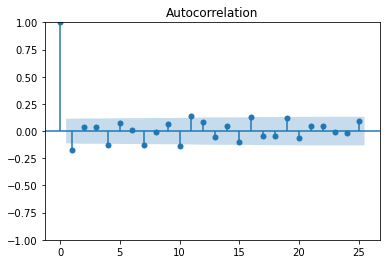

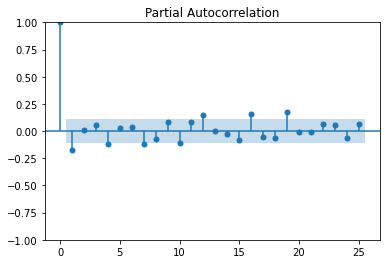

     lag        AC          Q       PAC  Prob(>Q)
0    1.0 -0.173653   9.137430 -0.173653  0.002504
1    2.0  0.038671   9.592095  0.008781  0.008262
2    3.0  0.041445  10.116074  0.051173  0.017605
3    4.0 -0.124719  14.877138 -0.113066  0.004963
4    5.0  0.072830  16.506147  0.031792  0.005538
5    6.0  0.009541  16.534201  0.033699  0.011157
6    7.0 -0.125985  21.442091 -0.119007  0.003168
7    8.0 -0.012002  21.486783 -0.074130  0.005961
8    9.0  0.068001  22.926444  0.079352  0.006364
9   10.0 -0.134301  28.561393 -0.107157  0.001467
10  11.0  0.142934  34.966098  0.076263  0.000251
11  12.0  0.082010  37.081895  0.140277  0.000217
12  13.0 -0.050913  37.900184 -0.000227  0.000299
13  14.0  0.045711  38.562096 -0.028638  0.000426
14  15.0 -0.101203  41.817990 -0.074266  0.000240
15  16.0  0.130299  47.234174  0.144172  0.000063
16  17.0 -0.043352  47.835854 -0.049585  0.000091
17  18.0 -0.049097  48.610306 -0.060261  0.000122
18  19.0  0.120523  53.293745  0.165791  0.000042


In [62]:
table = get_pdq(time_series_diff)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля.

По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают.

In [63]:
p, d, q = 1, 1, 1

In [64]:
def ts_arma(ts, p, d, q):
    model = ARIMA(ts, order=(p,d,q)).fit()
    print(model.summary())

    return model, model.predict()

In [65]:
model, result = ts_arma(time_series_diff, p=p,d=d, q=q)

                               SARIMAX Results                                
Dep. Variable:                <CLOSE>   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -864.060
Date:                Tue, 22 Mar 2022   AIC                           1734.120
Time:                        15:51:36   BIC                           1745.221
Sample:                             0   HQIC                          1738.563
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1724      0.035     -4.986      0.000      -0.240      -0.105
ma.L1         -0.9928      0.013    -73.671      0.000      -1.019      -0.966
sigma2        18.6620      0.692     26.975      0.0

/Users/rinatmahmutov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/rinatmahmutov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/rinatmahmutov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Как видно из данной информации в нашей модели все коэффициенты значимые

<AxesSubplot:>

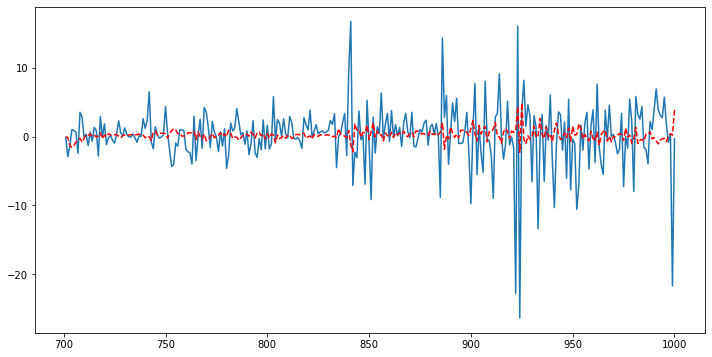

In [66]:
time_series_diff.plot(figsize=(12, 6))
result.plot(style='r--')

In [68]:
#свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам

q_test = acf(model.resid, qstat=True)
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

       Q-stat   p-value
0    0.000496  0.982229
1    0.078257  0.961627
2    0.311069  0.957933
3    4.201799  0.379384
4    5.204975  0.391380
5    5.205067  0.517794
6   10.916477  0.142304
7   11.114404  0.195301
8   11.710087  0.230151
9   15.291346  0.121795
10  21.439950  0.029089
11  24.669372  0.016470
12  25.038398  0.022817
13  25.152363  0.033093
14  27.066057  0.028203
15  30.957350  0.013626
16  31.328071  0.018213
17  31.875957  0.022742
18  35.480944  0.012215
19  35.971444  0.015500
20  36.499060  0.019204
21  37.402495  0.021358
22  37.402569  0.029492
23  37.402579  0.039875


Значение данной статистики и p-values, свидетельствуют о том, что гипотеза о случайности остатков отвергается, и скорее всего данный процесс не представляет «белый шум».

In [24]:
predictions_ARIMA_diff = pd.Series(result, copy=True)
predictions_ARIMA_diff.tail()

996    -0.712908
997    -0.021642
998     0.429337
999     0.214036
1000    3.869185
Name: predicted_mean, dtype: float64

In [25]:
predictions_ARIMA_diff.sum()

78.1453704560975

In [26]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

996     73.654455
997     73.632812
998     74.062149
999     74.276185
1000    78.145370
Name: predicted_mean, dtype: float64

In [28]:
predictions_ARIMA_log = pd.Series(time_series, index=time_series.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.tail()

996     241.004455
997     240.182812
998     241.062149
999     219.576185
1000    223.145370
dtype: float64

In [38]:
df1 = predictions_ARIMA_log

In [39]:
res = pd.concat([data_x, df1], axis=1)

In [71]:
res = res.rename(columns={'<CLOSE>' : "price"})

In [72]:
res = res.rename(columns={0 : "priceARIMA"})

In [73]:
res

,price,priceARIMA
700,85.66,85.660000
701,85.54,85.540000
702,82.64,82.520003
703,81.29,79.899581
704,82.32,79.362586
...,...,...
996,167.35,241.004455
997,166.55,240.182812
998,167.00,241.062149
999,145.30,219.576185


<AxesSubplot:>

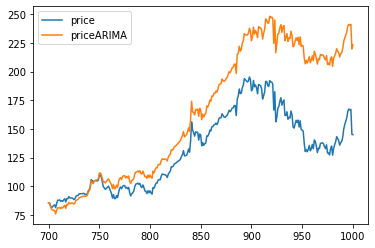

In [74]:
res.plot.line()

ARIMA — это хорошо, но ARIMA — это не все

# Задание 4. Определение волатильности.

Для исходных данных (можно взять c финам.ру) найти значение волатильности за некоторый промежуток времени.

- [harb](https://habr.com/ru/post/494636/)
- [en](https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/)

Данные: Акции Европы - Schneider Electric SE

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/Users/rinatmahmutov/Documents/DataSpell/Python Notebooks/data/financial_market_volatility/SND-TDG_210101_220324.csv')
df.tail()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
300,SND-TDG,D,20220315,0,146.86
301,SND-TDG,D,20220316,0,153.88
302,SND-TDG,D,20220318,0,151.44
303,SND-TDG,D,20220321,0,150.14
304,SND-TDG,D,20220323,0,151.22


In [3]:
df = df.rename(columns={'<CLOSE>' : "CLOSE"})
df['<DATE>'] = pd.to_datetime(df['<DATE>'].astype(str), format='%Y%m%d')
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,CLOSE
0,SND-TDG,D,2021-01-04,0,122.20
1,SND-TDG,D,2021-01-05,0,121.00
2,SND-TDG,D,2021-01-06,0,123.70
3,SND-TDG,D,2021-01-07,0,126.25
4,SND-TDG,D,2021-01-08,0,128.35


Скользящее окно (Moving Windows)


Смысл скользящего окна– с каждым новым значением функция пересчитывается за заданный период времени. Этих функций большое количество. Для примера: rolling.mean(), rolling.std(), которые чаще всего и используют при анализе движения акций. rolling.mean() — это обычная скользящая средняя, которая сглаживает краткосрочные колебания и позволяет визуализировать общую тенденцию.

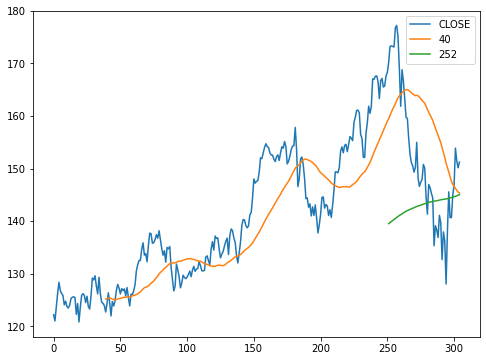

In [11]:
# Вычисление короткой скользящей средней
df['40'] = df['CLOSE'].rolling(window=40).mean()

# Вычисление длинной скользящей средней
df['252'] = df['CLOSE'].rolling(window=252).mean()

# Построение полученных значений
df[['CLOSE', '40', '252']].plot(figsize=(8, 6))

plt.show()

    <TICKER> <PER>     <DATE>  <TIME>   CLOSE   Log_Ret  Volatility
290  SND-TDG     D 2022-02-28       0  139.68 -0.010115    0.417259
291  SND-TDG     D 2022-03-01       0  132.68 -0.051414    0.412962
292  SND-TDG     D 2022-03-02       0  137.94  0.038879    0.438754
293  SND-TDG     D 2022-03-03       0  136.22 -0.012548    0.436948
294  SND-TDG     D 2022-03-07       0  128.02 -0.062085    0.469696
295  SND-TDG     D 2022-03-08       0  138.00  0.075067    0.538230
296  SND-TDG     D 2022-03-09       0  145.56  0.053335    0.565032
297  SND-TDG     D 2022-03-10       0  140.66 -0.034243    0.571656
298  SND-TDG     D 2022-03-11       0  140.66  0.000000    0.571132
299  SND-TDG     D 2022-03-14       0  144.92  0.029836    0.580245
300  SND-TDG     D 2022-03-15       0  146.86  0.013298    0.581614
301  SND-TDG     D 2022-03-16       0  153.88  0.046693    0.600584
302  SND-TDG     D 2022-03-18       0  151.44 -0.015984    0.594280
303  SND-TDG     D 2022-03-21       0  150.14 -0

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

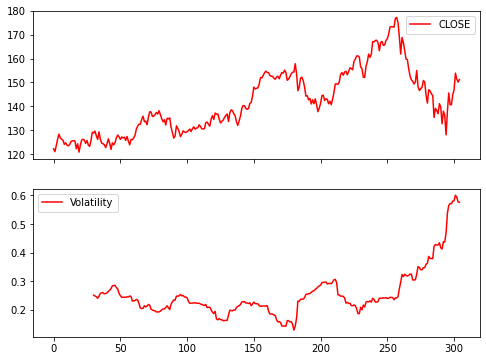

In [7]:
# всего данных(рабочие дни биржи)
dpy = len(df['<DATE>'])

# Определим рассматриваемый период
w = 30

# Вычислим логарифмическую доходность, используя цену закрытия
df['Log_Ret'] = np.log(df['CLOSE'] / df['CLOSE'].shift(1))

# Вычислим волатильность с помощью скользящего стандартного отклонения
df['Volatility'] = df['Log_Ret'].rolling(window=w).std() * np.sqrt(dpy)
print(df.tail(15))

# Графики ряд цен и волатильности
df[['CLOSE', 'Volatility']].plot(subplots=True, color='red',figsize=(8, 6))